In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("aps_failure_training_set1.csv")

In [5]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0
1,pos,453236,na,2926,na,0,0,0,0,222,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
2,pos,72504,na,1594,1052,0,0,0,244,178226,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
3,pos,762958,na,na,na,na,na,776,281128,2186308,...,na,na,na,na,na,na,na,na,na,na
4,pos,695994,na,na,na,na,na,0,0,0,...,1397742,495544,361646,28610,5130,212,0,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
36184,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
36185,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
36186,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [6]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
df=df.replace("na",np.nan)

In [8]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [9]:
df.isnull().sum().sum()

515662

In [11]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,29461
bq_000,29132
bp_000,28514
ab_000,27896
cr_000,27896
...,...
cj_000,203
ci_000,203
bt_000,86
aa_000,0


In [14]:
[feature for feature in df.columns if feature not in ['class']]

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [15]:
for feature in [feature for feature in df.columns if feature not in ['class']]:
    df[feature]=df[feature].fillna(df[feature].median())

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0,182,128.0,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0
1,pos,453236,0.0,2926,128.0,0,0,0,0,222,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
2,pos,72504,0.0,1594,1052,0,0,0,244,178226,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
3,pos,762958,0.0,152.0,128.0,0.0,0.0,776,281128,2186308,...,237850.0,113784.0,226356.0,195248.0,95594.0,42966.0,4278.0,0.0,0.0,0.0
4,pos,695994,0.0,152.0,128.0,0.0,0.0,0,0,0,...,1397742,495544,361646,28610,5130,212,0,0,0.0,0.0


In [18]:
x=df.drop("class",axis=1)

In [19]:
y=df["class"]

In [20]:
x.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  36188 non-null  int64 
 1    ab_000  36188 non-null  object
 2    ac_000  36188 non-null  object
 3    ad_000  36188 non-null  object
 4    ae_000  36188 non-null  object
 5    af_000  36188 non-null  object
 6    ag_000  36188 non-null  object
 7    ag_001  36188 non-null  object
 8    ag_002  36188 non-null  object
 9    ag_003  36188 non-null  object
 10   ag_004  36188 non-null  object
 11   ag_005  36188 non-null  object
 12   ag_006  36188 non-null  object
 13   ag_007  36188 non-null  object
 14   ag_008  36188 non-null  object
 15   ag_009  36188 non-null  object
 16   ah_000  36188 non-null  object
 17   ai_000  36188 non-null  object
 18   aj_000  36188 non-null  object
 19   ak_000  36188 non-null  object
 20   al_000  36188 non-null  object
 21   am_0    36188 non-null  object
 2

In [21]:
y=pd.get_dummies(y,drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 0)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28950, 170)
(7238, 170)
(28950, 1)
(7238, 1)


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [28]:
classifier=Sequential()

In [29]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =170))
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
 
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [30]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [32]:
x_train

array([[-0.02990834, -0.11959227, -0.42838894, ..., -0.15849242,
        -0.02156816, -0.02239316],
       [-0.38331653, -0.11959227, -0.42838878, ..., -0.15820525,
        -0.02156816, -0.02239316],
       [-0.39920288, -0.11959227, -0.42838892, ..., -0.15849242,
        -0.02156816, -0.02239316],
       ...,
       [ 0.40413421, -0.11959227, -0.42838861, ..., -0.15842063,
        -0.02156816, -0.02239316],
       [-0.1749179 , -0.11959227, -0.42838831, ...,  0.00297002,
        -0.02156816, -0.02239316],
       [-0.19501335, -0.11959227, -0.42838831, ..., -0.15849242,
        -0.02156816, -0.02239316]])

In [34]:
x_train.shape

(28950, 170)

In [35]:
model_history=classifier.fit(x_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
2172/2172 [==============================] - 7s 3ms/step - loss: 0.0890 - accuracy: 0.9765 - val_loss: 0.0457 - val_accuracy: 0.9827
Epoch 2/30
2172/2172 [==============================] - 6s 3ms/step - loss: 0.0430 - accuracy: 0.9851 - val_loss: 0.0415 - val_accuracy: 0.9855
Epoch 3/30
2172/2172 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9866 - val_loss: 0.0385 - val_accuracy: 0.9865
Epoch 4/30
2172/2172 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9877 - val_loss: 0.0373 - val_accuracy: 0.9880
Epoch 5/30
2172/2172 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9888 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 6/30
2172/2172 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.0387 - val_accuracy: 0.9885
Epoch 7/30
2172/2172 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9899 - val_loss: 0.0397 - val_accuracy:

In [36]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
model_history.history['accuracy']

[0.9764646291732788,
 0.9851234555244446,
 0.9865972995758057,
 0.9877486824989319,
 0.9887619614601135,
 0.9896370768547058,
 0.9898673295974731,
 0.9900515675544739,
 0.9911109209060669,
 0.9908345341682434,
 0.9910648465156555,
 0.9918017983436584,
 0.9919399619102478,
 0.9923544526100159,
 0.9924926161766052,
 0.9930453300476074,
 0.9929071664810181,
 0.9925386905670166,
 0.9929071664810181,
 0.9934598207473755,
 0.9927690029144287,
 0.9930914044380188,
 0.993828296661377,
 0.9935058951377869,
 0.9934138059616089,
 0.9940125346183777,
 0.994242787361145,
 0.9941046237945557,
 0.9939203858375549,
 0.9940586090087891]

In [38]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


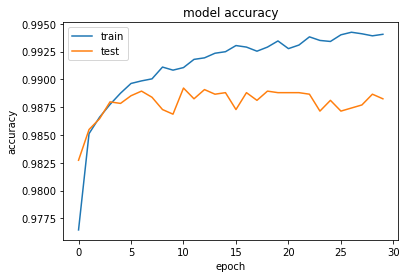

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

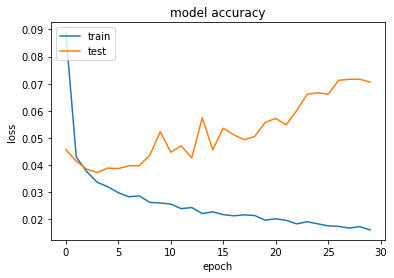

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
x_test.shape

(7238, 170)

In [42]:
y_pred=classifier.predict(x_test)

227/227 [==============================] - 0s 2ms/step


In [43]:
y_pred=y_pred>0.5

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_test.shape

(7238, 1)

In [46]:
y_pred.shape

(7238, 1)

In [47]:
confusion_matrix(y_test,y_pred)

array([[7034,   24],
       [  49,  131]], dtype=int64)

In [48]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [49]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS\Model_2023_01_23_20_17_53_.h5


In [50]:
#hyperparameter tuning with keras tuner

!pip install keras-tuner --upgrade

     -------------------------------------- 135.7/135.7 kB 4.0 MB/s eta 0:00:00


In [52]:
from keras_tuner.tuners import RandomSearch

In [53]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [54]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [55]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 16s]
val_accuracy: 0.9914340972900391

Best val_accuracy So Far: 0.9914340972900391
Total elapsed time: 00h 01m 03s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [57]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [58]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [60]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [61]:
tuner_second.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 01m 13s]
val_accuracy: 0.9751312732696533

Best val_accuracy So Far: 0.9912959337234497
Total elapsed time: 00h 04m 24s
INFO:tensorflow:Oracle triggered exit


In [62]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 16,
 'units_0': 416,
 'units_1': 288,
 'learning_rate': 0.0001,
 'units_2': 192,
 'units_3': 128,
 'units_4': 192,
 'units_5': 352,
 'units_6': 288,
 'units_7': 480,
 'units_8': 32,
 'units_9': 32,
 'units_10': 32,
 'units_11': 32,
 'units_12': 32,
 'units_13': 32,
 'units_14': 32,
 'units_15': 32}

In [66]:
model_2=tuner_second.get_best_models(num_models=1)[0]